In [4]:
#2a)
library("MASS")

In [5]:
#install.packages("klaR")
library("klaR")

In [11]:
load("Diabetes.RData")
dia <- Diabetes
dim(dia)
head(dia)

[1] 145   6

,relwt,glufast,glutest,instest,sspg,group
,<dbl>,<int>,<int>,<int>,<int>,<fct>
1,0.81,80,356,124,55,Normal
2,0.95,97,289,117,76,Normal
3,0.94,105,319,143,105,Normal
4,1.04,90,356,199,108,Normal
5,1.00,90,323,240,143,Normal
6,0.76,86,381,157,165,Normal


In [13]:
names(dia)
str(dia)

[1] "relwt"   "glufast" "glutest" "instest" "sspg"    "group"

'data.frame':	145 obs. of  6 variables:
 $ relwt  : num  0.81 0.95 0.94 1.04 1 0.76 0.91 1.1 0.99 0.78 ...
 $ glufast: int  80 97 105 90 90 86 100 85 97 97 ...
 $ glutest: int  356 289 319 356 323 381 350 301 379 296 ...
 $ instest: int  124 117 143 199 240 157 221 186 142 131 ...
 $ sspg   : int  55 76 105 108 143 165 119 105 98 94 ...
 $ group  : Factor w/ 3 levels "Normal","Chemical_Diabetic",..: 1 1 1 1 1 1 1 1 1 1 ...


-> We have the dataframe with dimensions of 145 rows and 6 columns.
-> Here, the columns relwt, glufast, glutest, instest, sspg are the independent variables and are numeric. 
-> And the target variable is group which is of 3 levels (Normal, Chemical_Diabetic, Diabetic). 

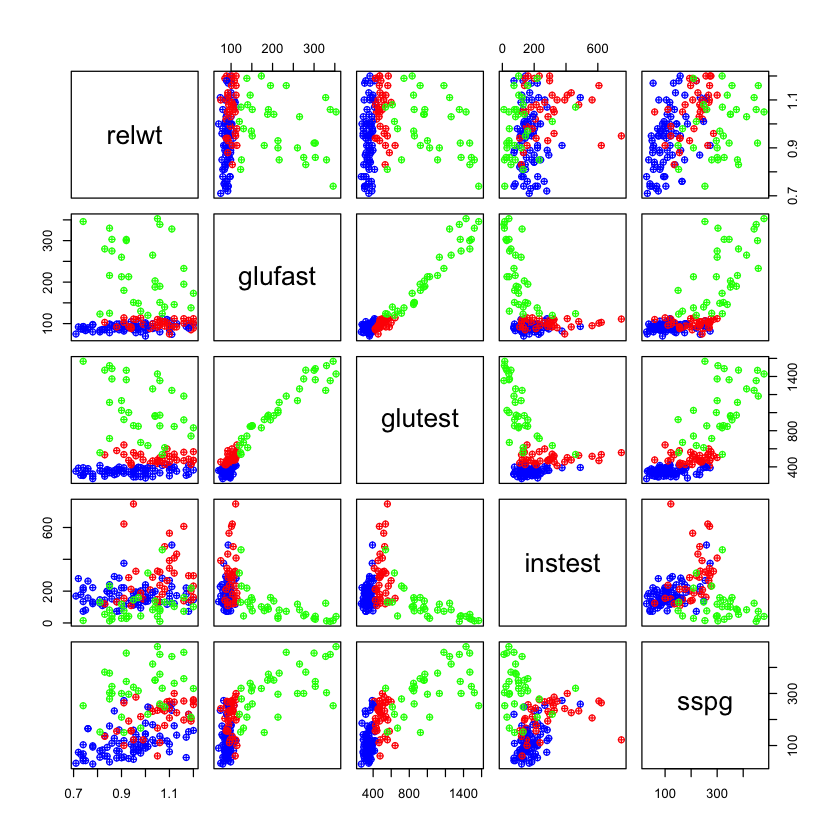

In [23]:
# 2a)
#plotting the scatter plots will all five variables with different classes
cols <- c("Blue", "Red", "Green")
pairs(dia[,1:5], pch = 10, cex = 1, col = cols[dia$group])

In [24]:
cov(dia[,1:5])

,relwt,glufast,glutest,instest,sspg
relwt,0.01670174,-7.281513e-02,9.824262e-01,3.473373,5.266255
glufast,-0.07281513,4.087097e+03,1.954606e+04,-3063.463649,4849.905651
glutest,0.98242625,1.954606e+04,1.004578e+05,-12918.162739,25908.490182
instest,3.47337308,-3.063464e+03,-1.291816e+04,14625.312548,101.482519
sspg,5.26625479,4.849906e+03,2.590849e+04,101.482519,11242.331897


Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


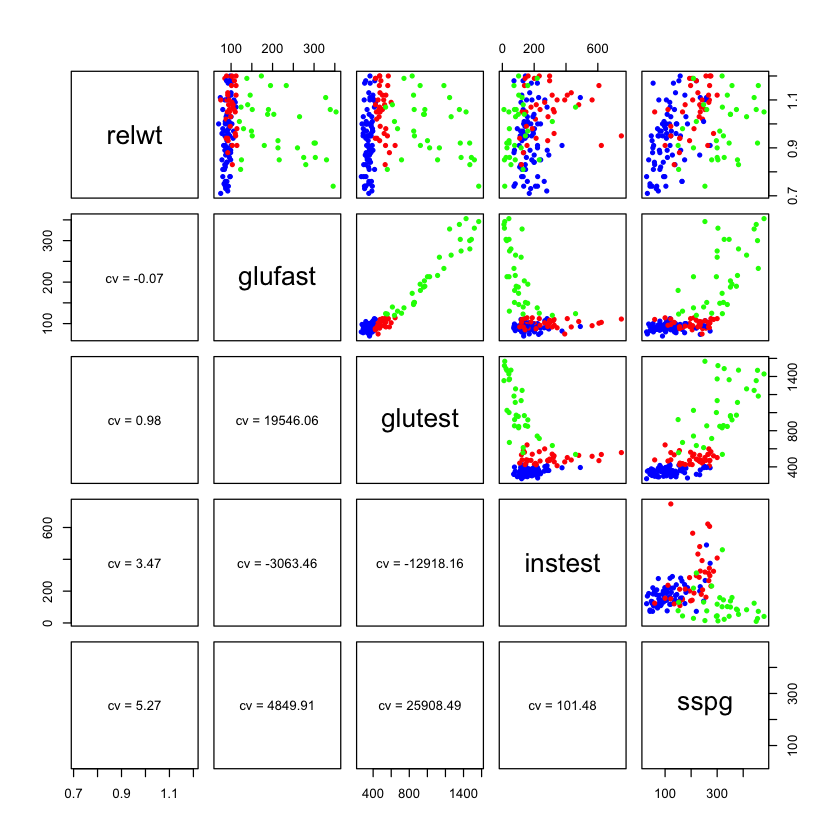

In [27]:
#plotting the pair plot with covariance
# covariance panel
panel.cov <- function(x, y){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- round(cov(x, y), digits=2)
    txt <- paste0("cv = ", r)
    text(0.5, 0.5, txt)
}
# Customize upper panel
upper.panel<-function(x, y){
  points(x,y, pch = 20, col = cols[dia$group])
}
# Create the plots
pairs(dia[,1:5], 
      lower.panel = panel.cov,
      upper.panel = upper.panel)

In [29]:
#3b)
cor(dia[,1:5])

,relwt,glufast,glutest,instest,sspg
relwt,1.000000000,-0.008813193,0.0239843,0.222237813,0.384319804
glufast,-0.008813193,1.000000000,0.9646281,-0.396234858,0.715480192
glutest,0.023984304,0.964628091,1.0000000,-0.337020435,0.770942459
instest,0.222237813,-0.396234858,-0.3370204,1.000000000,0.007914263
sspg,0.384319804,0.715480192,0.7709425,0.007914263,1.000000000


In [33]:
set.seed(150)
indis <- sample(1:nrow(dia), round(2/3*nrow(dia)), replace = FALSE)
train <- dia[indis,]
test <- dia[-indis,]
dim(train)
head(train)
dim(test)
head(test)

[1] 97  6

,relwt,glufast,glutest,instest,sspg,group
,<dbl>,<int>,<int>,<int>,<int>,<fct>
35,0.89,85,373,174,78,Normal
131,1.07,124,538,460,320,Overt_Diabetic
20,0.93,90,345,123,50,Normal
111,0.91,114,643,155,100,Chemical_Diabetic
15,0.74,86,312,208,68,Normal
135,0.98,130,670,44,167,Overt_Diabetic


[1] 48  6

,relwt,glufast,glutest,instest,sspg,group
,<dbl>,<int>,<int>,<int>,<int>,<fct>
1,0.81,80,356,124,55,Normal
2,0.95,97,289,117,76,Normal
5,1.00,90,323,240,143,Normal
7,0.91,100,350,221,119,Normal
8,1.10,85,301,186,105,Normal
11,0.90,91,353,221,53,Normal


In [34]:
#2b)
#fitting a lda model
lda.fit <- lda(group~., data = train)
lda.fit

Call:
lda(group ~ ., data = train)

Prior probabilities of groups:
           Normal Chemical_Diabetic    Overt_Diabetic 
        0.5257732         0.2164948         0.2577320 

Group means:
                      relwt   glufast  glutest  instest     sspg
Normal            0.9413725  92.17647 352.6078 169.5098 118.2745
Chemical_Diabetic 1.0595238  99.04762 493.8571 310.3333 214.0476
Overt_Diabetic    0.9944000 205.00000 992.5200 118.5600 307.0400

Coefficients of linear discriminants:
                  LD1          LD2
relwt    2.022234e-01 -3.029988349
glufast -4.028943e-02  0.032630539
glutest  1.295525e-02 -0.006419318
instest  6.390316e-05 -0.006773146
sspg     6.343179e-03  0.002370442

Proportion of trace:
   LD1    LD2 
0.8812 0.1188 

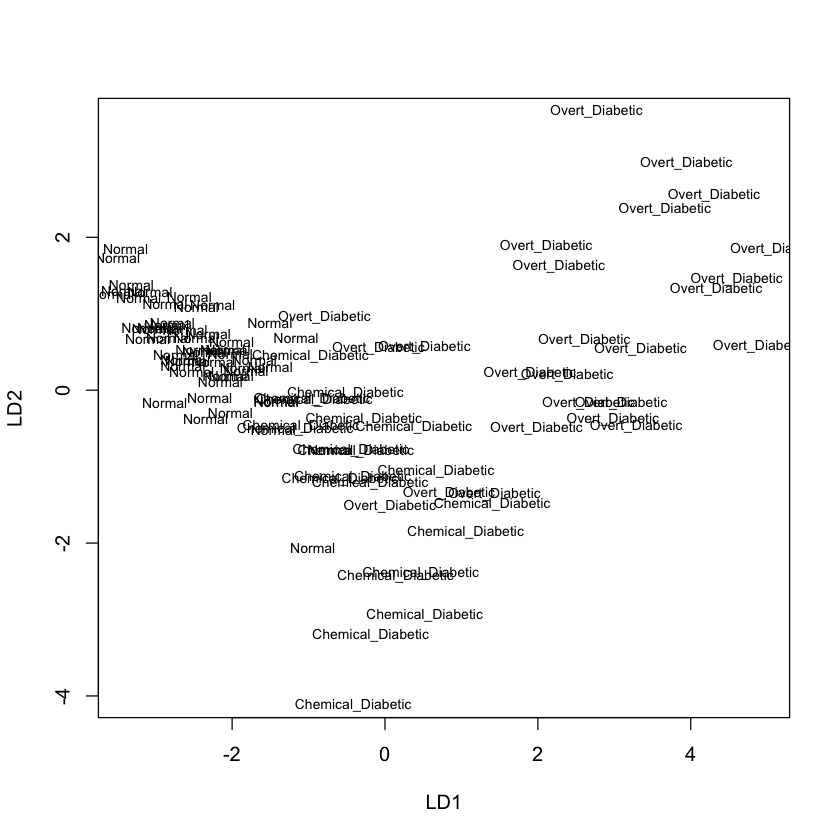

In [41]:
plot(lda.fit)

If observed carefully in the above plot, anything that is negative is considered as Normal.
Around 0 it is chemical Diabetic and above 1 it is over_diabetic

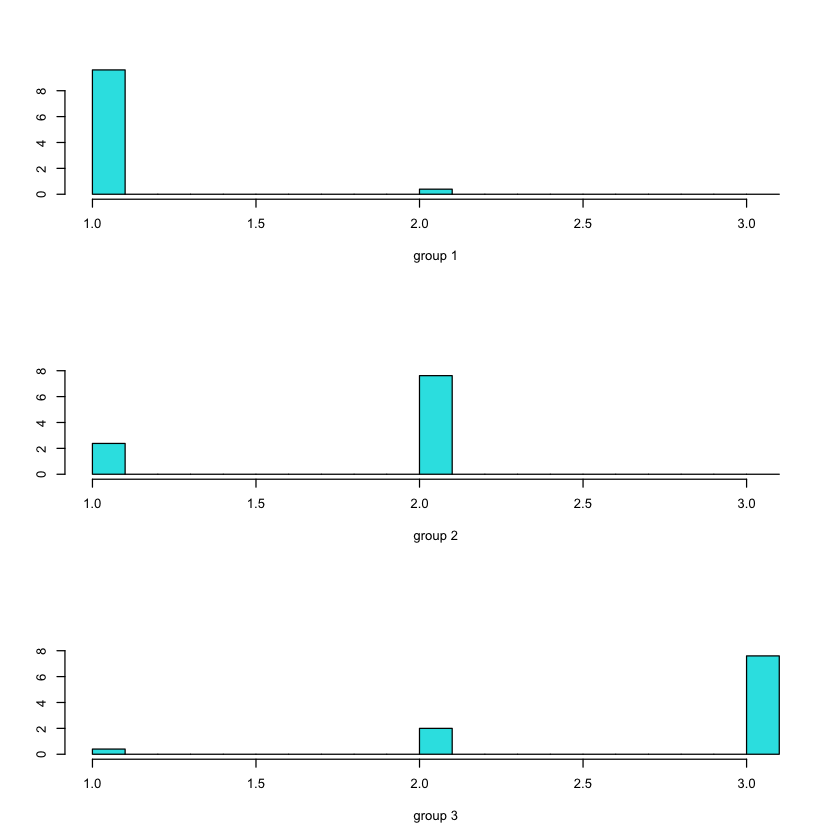

In [46]:
#predicting the train data with lda model
train_pred <- predict(lda.fit, newdata = train)
ldahist(data = as.numeric(train_pred$class), g = as.numeric(train$group))

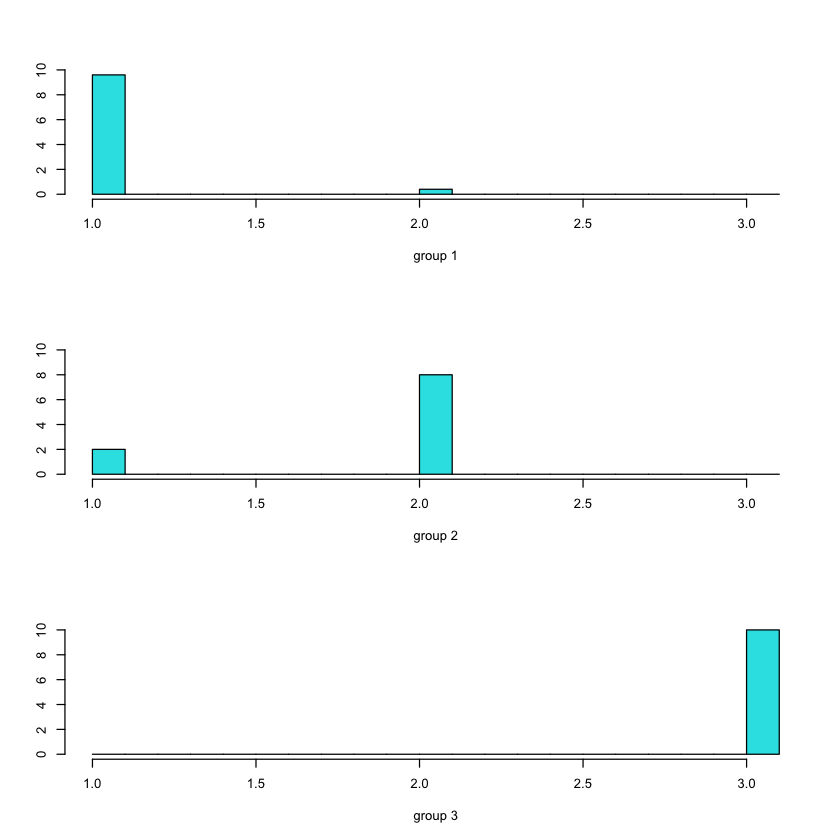

In [47]:
#predicting the test data with lda model
test_pred <- predict(lda.fit, newdata = test)
ldahist(data = as.numeric(test_pred$class), g = as.numeric(test$group))

In [49]:
#computing the train error and test error
train_error <- (1/length(train$group))*length(which(train$group != train_pred$class))
test_error <- (1/length(test$group))*length(which(test$group != test_pred$class))
train_error
test_error                                          

[1] 0.1340206

[1] 0.08333333

In [50]:
#fitting the qda model
qda.fit <- qda(group~., data = train)
qda.fit

Call:
qda(group ~ ., data = train)

Prior probabilities of groups:
           Normal Chemical_Diabetic    Overt_Diabetic 
        0.5257732         0.2164948         0.2577320 

Group means:
                      relwt   glufast  glutest  instest     sspg
Normal            0.9413725  92.17647 352.6078 169.5098 118.2745
Chemical_Diabetic 1.0595238  99.04762 493.8571 310.3333 214.0476
Overt_Diabetic    0.9944000 205.00000 992.5200 118.5600 307.0400

In [52]:
#predicting the train data with qda model
train_pred <- predict(qda.fit, newdata = train)
head(train_pred)

,Normal,Chemical_Diabetic,Overt_Diabetic
35,9.983973e-01,1.451179e-03,1.514836e-04
131,1.069397e-05,1.571187e-01,8.428706e-01
20,9.998692e-01,1.255235e-04,5.252326e-06
111,8.600136e-13,6.191387e-01,3.808613e-01
15,9.999919e-01,1.274217e-06,6.789327e-06
135,9.523300e-19,8.780401e-03,9.912196e-01
72,9.888091e-01,1.065679e-02,5.341163e-04
52,9.978566e-01,1.977576e-03,1.658498e-04
91,2.862616e-06,7.567845e-01,2.432126e-01
119,3.442260e-47,7.511202e-12,1.000000e+00


In [53]:
#predicting the test data with qda model
test_pred <- predict(qda.fit, newdata = test)
head(test_pred)

,Normal,Chemical_Diabetic,Overt_Diabetic
1,9.998193e-01,1.465692e-04,3.415012e-05
2,9.999917e-01,6.544841e-06,1.796101e-06
5,9.980853e-01,1.667022e-03,2.477218e-04
7,9.998388e-01,1.015556e-04,5.967002e-05
8,9.986916e-01,1.108434e-03,1.999793e-04
11,9.994919e-01,4.403433e-04,6.773768e-05
12,9.999980e-01,2.782117e-07,1.709272e-06
17,9.993631e-01,6.132039e-04,2.369320e-05
21,9.992187e-01,7.543595e-04,2.695619e-05
25,9.987005e-01,6.442584e-04,6.552622e-04


In [54]:
#computing the train error and test error
train_error <- (1/length(train$group))*length(which(train$group != train_pred$class))
test_error <- (1/length(test$group))*length(which(test$group != test_pred$class))
train_error
test_error                                          

[1] 0.05154639

[1] 0.04166667

From the above results error in train and test for lda and qda, It is visible that LDA performs well than QDA in our case.

In [55]:
#2c)
relwt <- 1.86 
glufast <- 184 
glutest <- 68 
instest <- 122 
sspg <- 544 

new_df <- data.frame(relwt, glufast, glutest, instest, sspg)
new_df

relwt,glufast,glutest,instest,sspg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.86,184,68,122,544


In [56]:
#predicting the class using LDA
predict(lda.fit, newdata = new_df)$class

[1] Normal
Levels: Normal Chemical_Diabetic Overt_Diabetic

In [57]:
#predicting the class using QDA
predict(qda.fit, newdata = new_df)$class

[1] Overt_Diabetic
Levels: Normal Chemical_Diabetic Overt_Diabetic

For the given variables, following are the classes assigned by each models:
LDA : Normal
QDA : Overt_Diabetic

In [58]:
#2c)
rda.fit <- rda(group ~., data = train, regularization = c(gamma = 0, lambda = 0.5))
rda.fit

Call: 
rda(formula = group ~ ., data = train, regularization = c(gamma = 0, 
    lambda = 0.5))

Regularization parameters: 
 gamma lambda 
   0.0    0.5 

Prior probabilities of groups: 
           Normal Chemical_Diabetic    Overt_Diabetic 
        0.5257732         0.2164948         0.2577320 

Misclassification rate: 
       apparent: 12.371 %

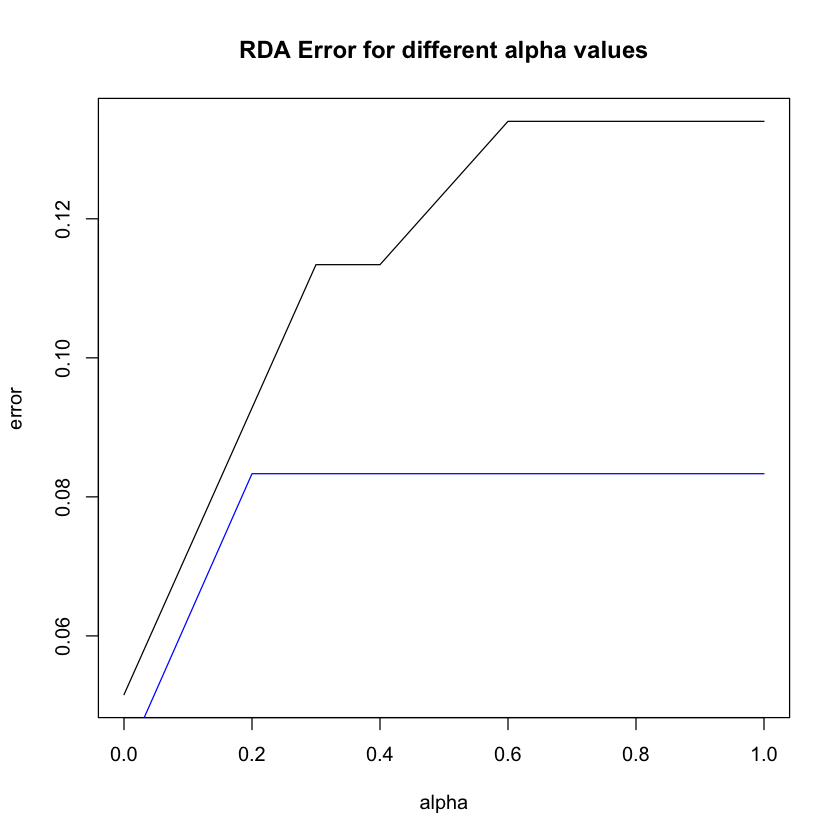

In [61]:
#applying the rda for different alpha values
alpha <- seq(from = 0, to = 1, by = .1)
error_rate_train.rda <- c()
error_rate_test.rda <- c()

for (i in seq(1,length(alpha))){
    rda.fit <- rda(group ~., data = train, regularization = c(gamma = 0, lambda = alpha[i]))
    #print(i)
    y_hat_train <- predict(rda.fit, newdata = train)$class 
    y_hat_test <- predict(rda.fit, newdata = test)$class 
    train_error <- (1/length(y_hat_train))*(length(which(y_hat_train != train$group)))
    test_error <- (1/length(y_hat_test))*(length(which(y_hat_test != test$group)))
    error_rate_train.rda <- c(error_rate_train.rda, train_error)
    error_rate_test.rda <- c(error_rate_test.rda, test_error)
}

plot(alpha, error_rate_train.rda, type= 'l', col = 'black', xlab = "alpha", ylab = "error", main = "RDA Error for different alpha values")
lines(alpha, error_rate_test.rda, col = 'blue')

The optimal value of alpha is 0.2.